# 환경 세팅

## 한글폰트 설치 (런타임 재시작 필요)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (46.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and direc

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


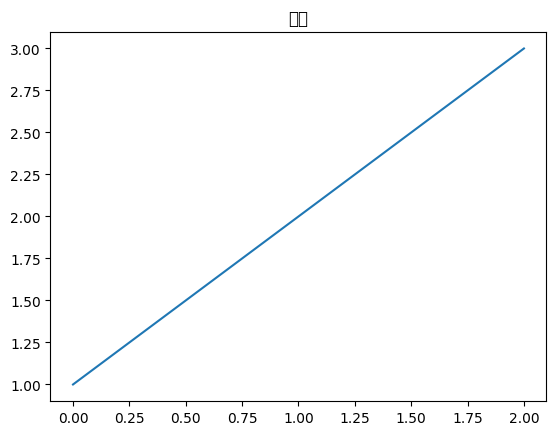

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic")

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib


data = pd.read_csv('/content/머신러닝.csv')
data.head()

,YEAR,MONTH,DAY,LINE,STATION,DIRECTION,TIME_00,CONGESTION
0,2011,1,금,1,동대문,상선,TIME_05,9.1
1,2011,1,금,1,동대문,상선,TIME_06,12.2
2,2011,1,금,1,동대문,상선,TIME_07,23.3
3,2011,1,금,1,동대문,상선,TIME_08,44.6
4,2011,1,금,1,동대문,상선,TIME_09,39.6


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233520 entries, 0 to 233519
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        233520 non-null  int64  
 1   MONTH       233520 non-null  int64  
 2   DAY         233520 non-null  object 
 3   LINE        233520 non-null  int64  
 4   STATION     233520 non-null  object 
 5   DIRECTION   233520 non-null  object 
 6   TIME_00     233520 non-null  object 
 7   CONGESTION  233520 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 14.3+ MB


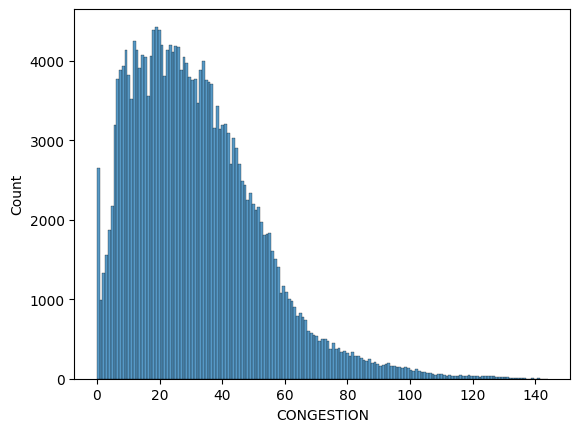

In [30]:
# 혼잡도 분포도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(data=data, x='CONGESTION')
plt.show()

# 머신러닝 코드

In [31]:
# 데이터를 독립변수(X)와 종속변수(y)로 나눕니다.
X = data[['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']]
y = data['CONGESTION']

# 데이터를 학습, 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 훈련+검증/ 테스트 데이터 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 / 검증 데이터 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.375, random_state=42)

In [32]:
# 범주형 열에 OneHot 인코딩을 적용
categorical_features = ['YEAR', 'MONTH', 'DAY', 'STATION', 'DIRECTION', 'TIME_00']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')  # 나머지 변수를 유지

In [35]:
# LinearRegression 모델 정의
lin_reg = LinearRegression(copy_X=True)

# Pipeline을 정의합니다.
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # ColumnTransformer를 적용하여 원핫 인코딩 수행
    ('Lin_reg', lin_reg)  # LinearRegression 모델 사용
])


In [36]:
# Pipeline을 사용하여 모델을 학습합니다.
pipeline.fit(X_train, y_train)

# 검증 데이터를 사용하여 모델의 성능을 평가합니다.
y_val_pred = pipeline.predict(X_val)

# 성능 지표 계산
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val = r2_score(y_val, y_val_pred)

# 결과를 출력합니다.
print("Validation 성능 지표:")
print("Mean Absolute Error (MAE):", mae_val)
print("Root Mean Squared Error (RMSE):", rmse_val)
print("R-squared (R2):", r2_val)

# 테스트 데이터를 사용하여 모델의 성능을 평가합니다.
y_test_pred = pipeline.predict(X_test)

# 성능 지표 계산
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

# 결과를 출력합니다.
print("\nTest 성능 지표:")
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R2):", r2_test)

Validation 성능 지표:
Mean Absolute Error (MAE): 9.63461182329559
Root Mean Squared Error (RMSE): 12.998031937032987
R-squared (R2): 0.5968884334034534

Test 성능 지표:
Mean Absolute Error (MAE): 9.639759159465536
Root Mean Squared Error (RMSE): 13.043333860449001
R-squared (R2): 0.5956822770740731


In [40]:
# 예측할 데이터 예시
new_data = pd.DataFrame({'YEAR': ['2011'], 'MONTH': ['1'], 'DAY': ['금'], 'LINE': ['상선'], 'STATION': ['동대문'] ,
                         'TIME_00':['TIME_05'] , 'DIRECTION': ['상선'] , 'CONGESTION' : ['9.1']})

# 예측을 수행합니다.
predicted_congestion = model.predict(new_data)

# 예측 결과를 출력합니다.
print("예측 혼잡도:", predicted_congestion)

예측 혼잡도: [24.68799917]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
